In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]=''
import tensorflow as tf
import numpy as np
import numpy.random as rng
import numpy as np
import matplotlib.pyplot as plt

# import plotly
# import plotly.graph_objs as go

import pickle
# import itertools
# from utils.utils import tf_matmul_r, tf_matmul_l, tf_eigvecs, tf_eigvals
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


In [2]:
# iteration =10000
with open('/home/prashanth/synthfeedback/Pickles/MNIST_validation_test.pkl','rb') as f:
    store_al,store_acc,store_df,store_err,combo,eta_1,eta_lmda,non_converge,iteration=pickle.load(f,encoding='latin1')

In [3]:
store_err_s=[]
store_al_s=[]
store_acc_s=[]
store_df_s=[]
print("Following indexes did not converge",non_converge)
for count in range(store_err.shape[0]):
    if count in non_converge:
        print("removing row:",count)
    else:
        store_err_s.append(store_err[count,:])
        store_acc_s.append(store_acc[count,:])
        store_al_s.append(store_al[count,:])
        store_df_s.append(store_df[count,:])

store_err_s=np.array(store_err_s)
store_acc_s=np.array(store_acc_s)
store_al_s=np.array(store_al_s)
store_df_s=np.array(store_df_s)

for val in sorted(non_converge,reverse=True):
    del combo[val]
eta_1new=[]
eta_lmdanew=[]
for first,second in combo:
    if first not in eta_1new:
        eta_1new.append(first)
    if second not in eta_lmdanew:
        eta_lmdanew.append(second)
eta_1new=np.array(eta_1new)
eta_lmdanew=np.array(eta_lmdanew)

Following indexes did not converge [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
removing row: 35
removing row: 36
removing row: 37
removing row: 38
removing row: 39
removing row: 40
removing row: 41
removing row: 42
removing row: 43
removing row: 44
removing row: 45
removing row: 46
removing row: 47
removing row: 48


In [4]:
last_acc=np.zeros([eta_1new.shape[0]*eta_lmdanew.shape[0],10])
mean_acc=np.zeros([eta_1new.shape[0]*eta_lmdanew.shape[0],1])
for num in range(store_acc_s.shape[0]):
    last_acc[num,:]=store_acc[num,iteration-10:iteration]
    mean_acc[num]=np.mean(store_acc[num,iteration-10:iteration])
reshape_acc=np.flipud(np.reshape(mean_acc,[eta_1new.shape[0], eta_lmdanew.shape[0]]))

In [5]:
#storing last values for error and reshaping into appropriate format
last_val=np.zeros([eta_1new.shape[0]*eta_lmdanew.shape[0],1])
for num in range(store_err_s.shape[0]):
    last_val[num]=store_err_s[num][-1]
reshape_err=np.flipud(np.reshape(last_val,[eta_1new.shape[0],eta_lmdanew.shape[0]]))
#reshape_err = np.reshape(last_val, [eta_1new.shape[0], eta_lmdanew.shape[0]]).T



In [6]:
lf_df=np.zeros([eta_1new.shape[0]*eta_lmdanew.shape[0],10]) #stores last 10 norm_dfs
mean_df=np.zeros([eta_1new.shape[0]*eta_lmdanew.shape[0],1]) #stores mean of last 10 norm_dfs
for num in range(store_df_s.shape[0]):
    lf_df[num,:]=store_df[num,iteration-10:iteration]
    mean_df[num]=np.mean(store_df[num,iteration-10:iteration])
    
reshape_df=np.flipud(np.reshape(mean_df,[eta_1new.shape[0],eta_lmdanew.shape[0]]))

In [7]:
last_al=np.zeros([eta_1new.shape[0]*eta_lmdanew.shape[0],1])
for num2 in range(store_al_s.shape[0]):
    last_al[num2]=store_al_s[num2][-1]

reshape_al=np.flipud(np.reshape(last_al,[eta_1new.shape[0],eta_lmdanew.shape[0]]))

In [8]:
# # x=[i for i in range(iteration)]
# for i in range(len(store_err_s)):
#     leg='Combination '+str(i+1)
#     plt.plot(store_err_s[i,:],label=leg)
# plt.legend()
# plt.show()

In [9]:
eta_xtick=np.sort(eta_lmdanew)
for x in range(len(eta_lmdanew)):
    eta_xtick[x]="%0.1e" % eta_xtick[x]
eta_ytick=np.sort(eta_1new)
for y in range(len(eta_1new)):
    eta_ytick[y]="%0.1e" % eta_ytick[y]

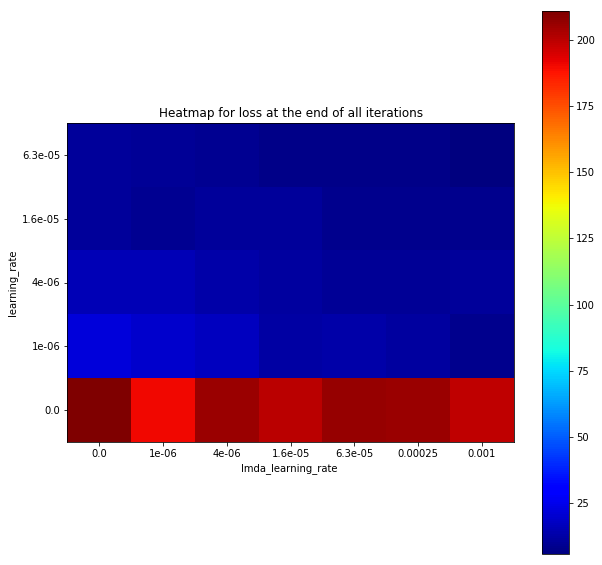

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
# plt.axes(xscale='log',yscale='log')
# ax.locator_params(axis='y',nbins=len(eta_ytick))
# ax.locator_params(axis='x',nbins=len(eta_xtick))
h=ax.imshow(reshape_err, cmap='jet',interpolation='none')
plt.colorbar(h,ax=ax)
xlabels = [item.get_text() for item in ax.get_xticklabels()]
xlabels[1:eta_xtick.shape[0]+1]=eta_xtick
ax.set_xticklabels(xlabels)
# ax.set_xticklabels([str(eta) for eta in eta_xtick])


ylabels = [item.get_text() for item in ax.get_yticklabels()]
ylabels[1:eta_ytick.shape[0]+1]=eta_ytick
ax.set_yticklabels(ylabels[::-1])


# ax.set_xticks(strings)
# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 0.712123))
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01e'))

ax.locator_params(axis='x',nbins=len(eta_xtick))
ax.locator_params(axis='y',nbins=len(eta_ytick))


# ax.set_ticks(eta_xtick)

ax.set_xlabel("lmda_learning_rate ")
ax.set_ylabel("learning_rate")
plt.title("Heatmap for loss at the end of all iterations")
plt.show()

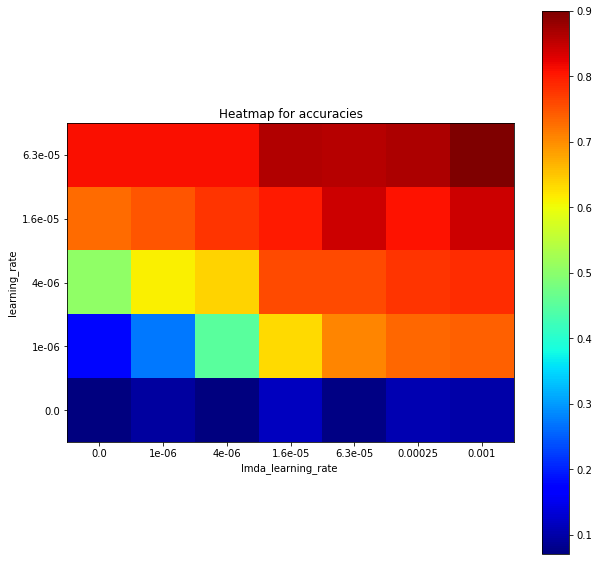

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
# plt.axes(xscale='log',yscale='log')
# ax.locator_params(axis='y',nbins=len(eta_ytick))
# ax.locator_params(axis='x',nbins=len(eta_xtick))
h=ax.imshow(reshape_acc, cmap='jet',interpolation='none')
plt.colorbar(h,ax=ax)
xlabels = [item.get_text() for item in ax.get_xticklabels()]
xlabels[1:eta_xtick.shape[0]+1]=eta_xtick
ax.set_xticklabels(xlabels)
# ax.set_xticklabels([str(eta) for eta in eta_xtick])


ylabels = [item.get_text() for item in ax.get_yticklabels()]
ylabels[1:eta_ytick.shape[0]+1]=eta_ytick
ax.set_yticklabels(ylabels[::-1])


# ax.set_xticks(strings)
# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 0.712123))
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01e'))

ax.locator_params(axis='x',nbins=len(eta_xtick))
ax.locator_params(axis='y',nbins=len(eta_ytick))


# ax.set_ticks(eta_xtick)

ax.set_xlabel("lmda_learning_rate ")
ax.set_ylabel("learning_rate")
plt.title("Heatmap for accuracies")
plt.show()

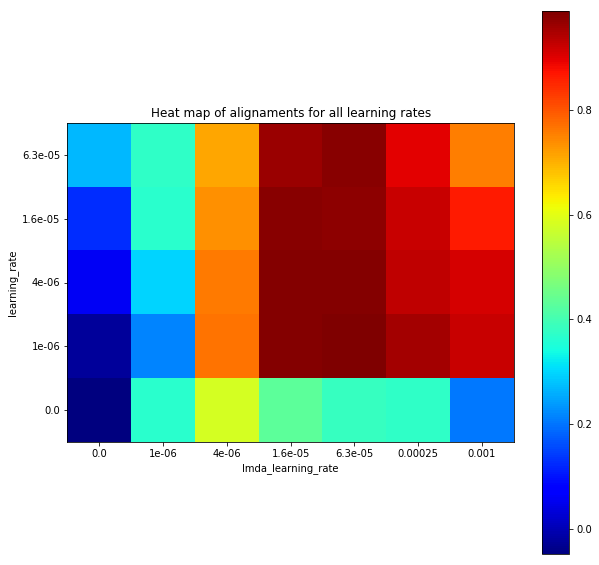

In [12]:
# eta_xtick1=np.sort(eta_lmda)
# for x in range(len(eta_lmda)):
#     eta_xtick1[x]="%0.1e" % eta_xtick1[x]
# eta_ytick1=np.sort(eta_1)
# for y in range(len(eta_1)):
#     eta_ytick1[y]="%0.1e" % eta_ytick1[y]
    
    
fig,ax=plt.subplots(1,1,figsize=(10,10))

h2=plt.imshow(reshape_al,cmap='jet')
plt.colorbar(h2,ax=ax)
xlabels = [item.get_text() for item in ax.get_xticklabels()]
xlabels[1:eta_xtick.shape[0]+1]=eta_xtick
ax.set_xticklabels(xlabels)
# ax.set_xticklabels([str(eta) for eta in eta_xtick])


ylabels = [item.get_text() for item in ax.get_yticklabels()]
ylabels[1:eta_ytick.shape[0]+1]=eta_ytick
ax.set_yticklabels(ylabels[::-1])


# ax.set_xticks(strings)
# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 0.712123))
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01e'))

ax.locator_params(axis='x',nbins=len(eta_xtick))
ax.locator_params(axis='y',nbins=len(eta_ytick))


plt.title("Heat map of alignaments for all learning rates")
ax.set_xlabel("lmda_learning_rate")
ax.set_ylabel("learning_rate")
plt.show()

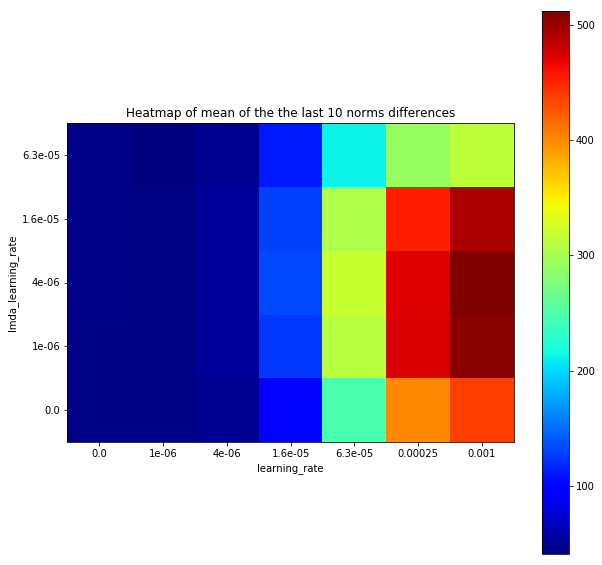

In [14]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
h3=plt.imshow(reshape_df,cmap='jet',origin='lower')
plt.colorbar(h3,ax=ax)

xlabels = [item.get_text() for item in ax.get_xticklabels()]
xlabels[1:eta_xtick.shape[0]+1]=eta_xtick
ax.set_xticklabels(xlabels)
# ax.set_xticklabels([str(eta) for eta in eta_xtick])


ylabels = [item.get_text() for item in ax.get_yticklabels()]
ylabels[1:eta_ytick.shape[0]+1]=eta_ytick
ax.set_yticklabels(ylabels)


# ax.set_xticks(strings)
# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 0.712123))
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01e'))

ax.locator_params(axis='x',nbins=len(eta_xtick))
ax.locator_params(axis='y',nbins=len(eta_ytick))

plt.title("Heatmap of mean of the the last 10 norms differences")
plt.xlabel("learning_rate")
plt.ylabel("lmda_learning_rate")
plt.show()

# for iter in range(lf_df.shape[0]):
#     leg='Combination '+str(iter+1)
#     plt.plot(lf_df[iter,:],label=leg)
# plt.title("Last 10 norm fifferences for every combination of learnig rates")
# plt.legend()
# plt.show()           
    
# # fig, ax1 = plt.subplots(1,1)
# # data = np.random.randint(0, 100, size=(10, 10))
# # ax1.imshow(data, cmap='jet', interpolation='nearest')
# # ax1.set_xticklabels(['', 0,10,20,30,40])
# # plt.show()